<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/FeatureEngineering/HandlingOutliers/OutlierDetectionWithPercentile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
url = "https://raw.githubusercontent.com/astrovishalthakur/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.shape

(10000, 3)

In [7]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


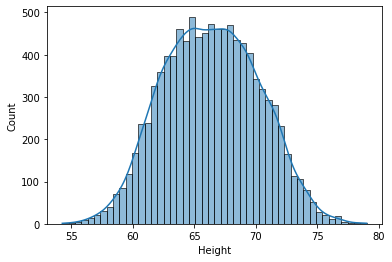

In [12]:
sns.histplot(df.Height, kde=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


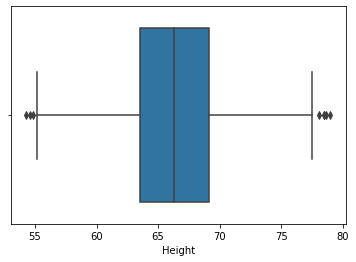

In [17]:
sns.boxplot(df.Height)

In [19]:
upper_limit = df['Height'].quantile(0.99)


lower_limit = df['Height'].quantile(0.01)
lower_limit, upper_limit

(58.134411586716546, 74.7857900583366)

In [20]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

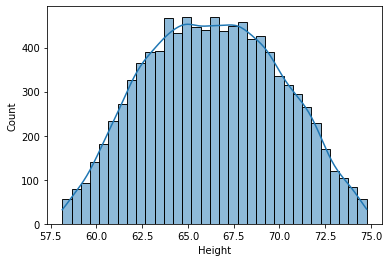

In [22]:
sns.histplot(new_df.Height, kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


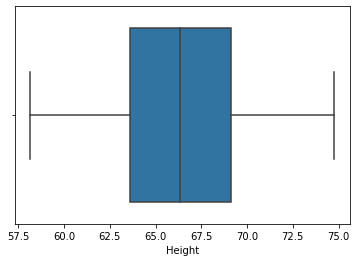

In [24]:
sns.boxplot(new_df['Height'])

# Capping (winsorization)

In [25]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [27]:
df.shape

(10000, 3)

In [26]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

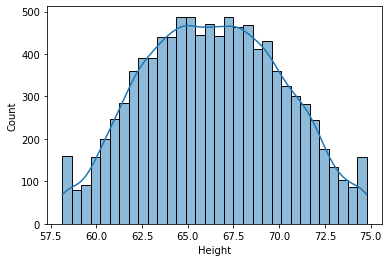

In [28]:
sns.histplot(df.Height, kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


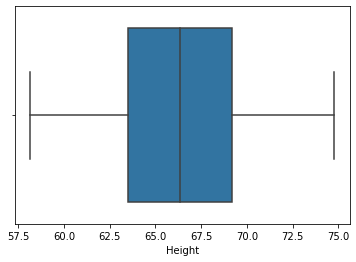

In [29]:
sns.boxplot(df['Height'])